# Lab - 7

Name: Purusharth Malik
    
Registration No.: 2348542

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Plotting RGB images
def plot_image(img, title, og_im = cv2.imread('images/bird.png', cv2.IMREAD_GRAYSCALE), og_title="Original Image"):    
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(og_im, cmap='gray')
    plt.title(og_title)
    plt.subplot(1, 2, 2)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.show()

### Creating the filters

In [8]:
# Median Filter
def median_filter_custom(image, kernel_size):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.median(neighbors)
    return result

# Maximum Filter
def max_filter_custom(image, kernel_size):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.max(neighbors)
    return result

# Minimum Filter
def min_filter_custom(image, kernel_size):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            result[i, j] = np.min(neighbors)
    return result


# Midpoint Filter
def midpoint_filter(image, kernel_size):
    max_filtered = max_filter_custom(image, kernel_size)
    min_filtered = min_filter_custom(image, kernel_size)
    result = (max_filtered + min_filtered) / 2
    return result

# Alpha-trimmed Filter
def alpha_trimmed_filter(image, kernel_size, alpha):
    result = np.zeros_like(image)
    padded_image = np.pad(image, ((kernel_size // 2, ), (kernel_size // 2, )), mode='constant')
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            neighbors = padded_image[i:i+kernel_size, j:j+kernel_size].flatten()
            neighbors = np.sort(neighbors)
            trimmed_neighbors = neighbors[alpha:-alpha]
            result[i, j] = np.mean(trimmed_neighbors)
    return result

### Loading the image

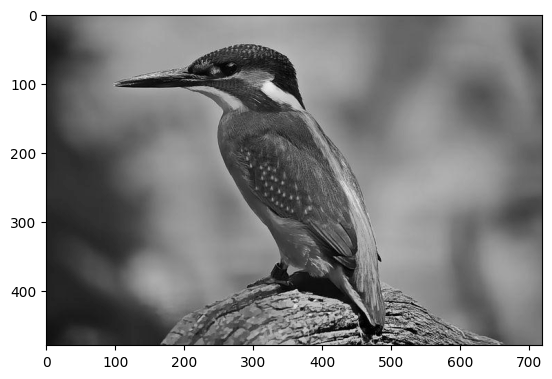

In [9]:
image = cv2.imread('bird_new.jpeg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray')
plt.show()

### Removing Salt Noise using all the filters

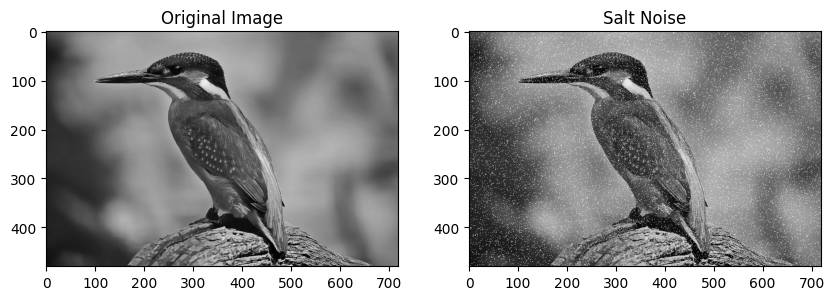

In [10]:
from skimage.util import random_noise

# Adding salt noise the the image
img_salt = random_noise(image, mode='salt')
img_salt = (255 * img_salt).astype(np.uint8)

plot_image(img_salt, "Salt Noise")

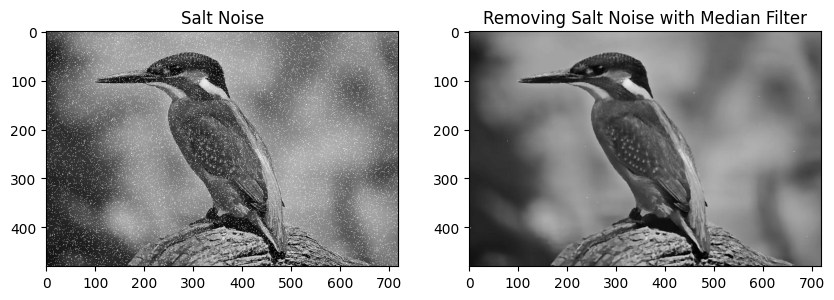

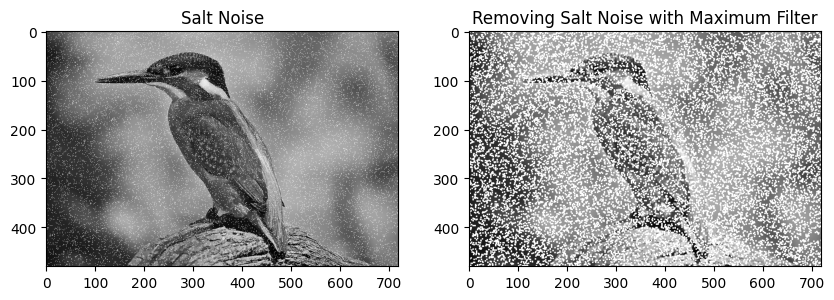

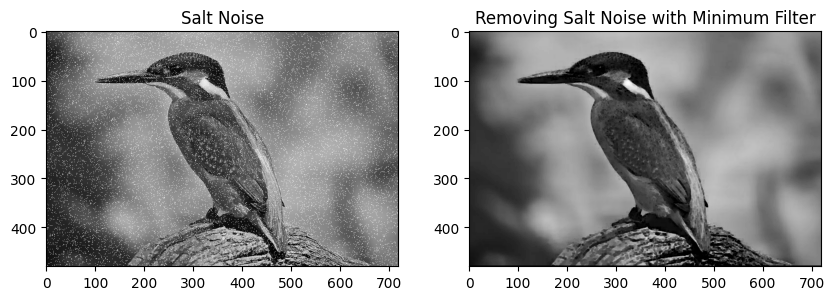

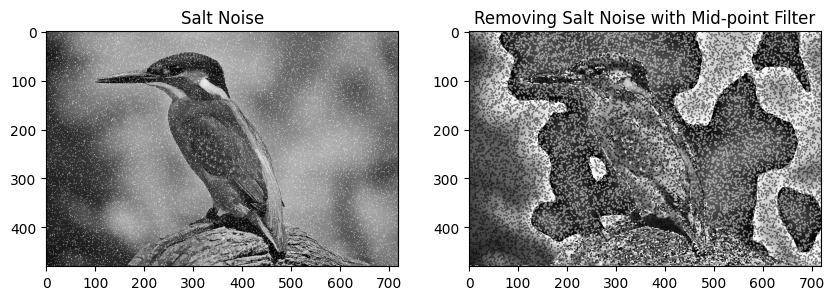

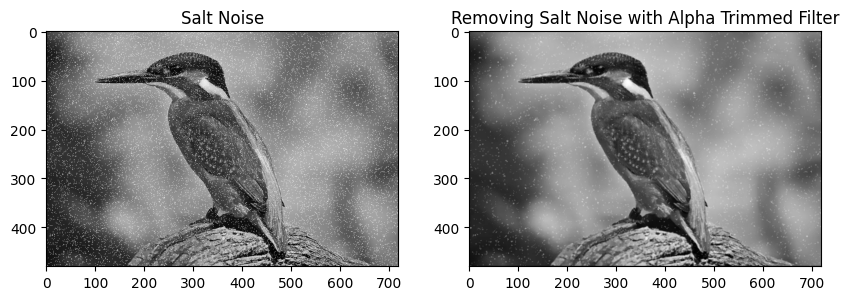

In [11]:
plot_image(median_filter_custom(img_salt, kernel_size=3), "Removing Salt Noise with Median Filter", og_im=img_salt, og_title="Salt Noise")

plot_image(max_filter_custom(img_salt, kernel_size=3), "Removing Salt Noise with Maximum Filter", og_im=img_salt, og_title="Salt Noise")

plot_image(min_filter_custom(img_salt, kernel_size=3), "Removing Salt Noise with Minimum Filter", og_im=img_salt, og_title="Salt Noise")

plot_image(midpoint_filter(img_salt, kernel_size=3), "Removing Salt Noise with Mid-point Filter", og_im=img_salt, og_title="Salt Noise")

plot_image(alpha_trimmed_filter(img_salt, kernel_size=3, alpha=1), "Removing Salt Noise with Alpha Trimmed Filter", og_im=img_salt, og_title="Salt Noise")

### Removing Pepper Noise using all the filters

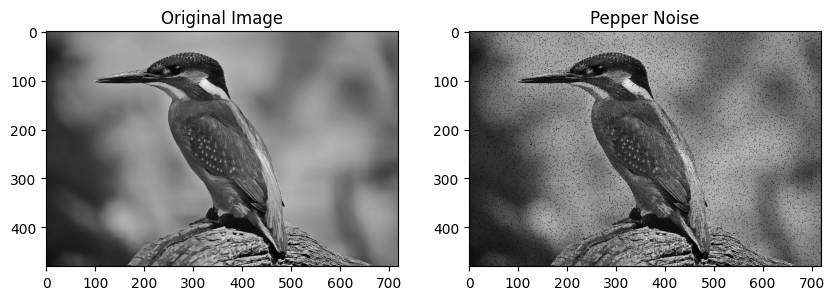

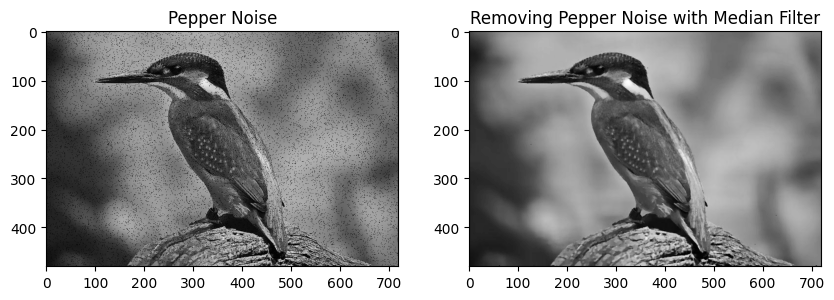

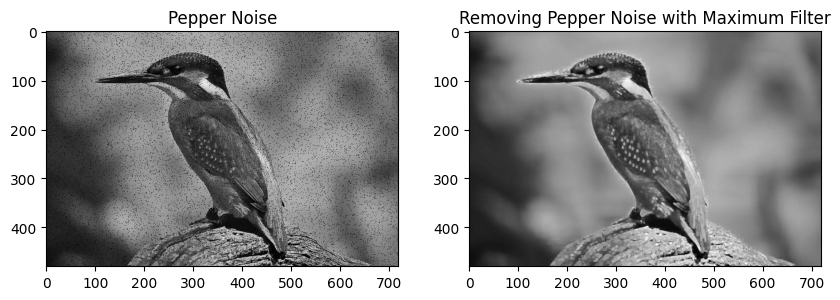

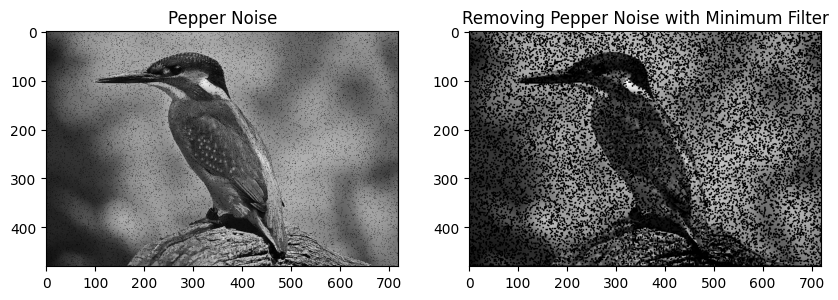

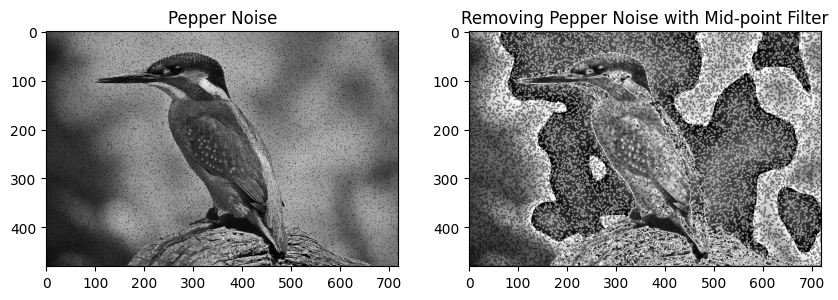

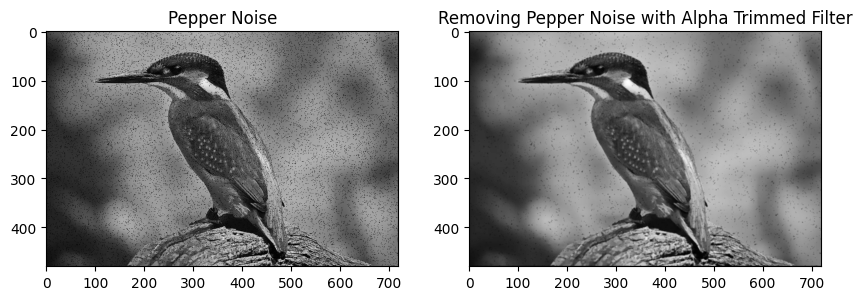

In [12]:
# Adding pepper noise to the image
img_pepper = random_noise(image, mode='pepper')
img_pepper = (255 * img_pepper).astype(np.uint8)

plot_image(img_pepper, "Pepper Noise")

plot_image(median_filter_custom(img_pepper, kernel_size=3), "Removing Pepper Noise with Median Filter", og_im=img_pepper, og_title="Pepper Noise")

plot_image(max_filter_custom(img_pepper, kernel_size=3), "Removing Pepper Noise with Maximum Filter", og_im=img_pepper, og_title="Pepper Noise")

plot_image(min_filter_custom(img_pepper, kernel_size=3), "Removing Pepper Noise with Minimum Filter", og_im=img_pepper, og_title="Pepper Noise")

plot_image(midpoint_filter(img_pepper, kernel_size=3), "Removing Pepper Noise with Mid-point Filter", og_im=img_pepper, og_title="Pepper Noise")

plot_image(alpha_trimmed_filter(img_pepper, kernel_size=3, alpha=1), "Removing Pepper Noise with Alpha Trimmed Filter", og_im=img_pepper, og_title="Pepper Noise")

### Removing Salt & Pepper Noise using all the filters

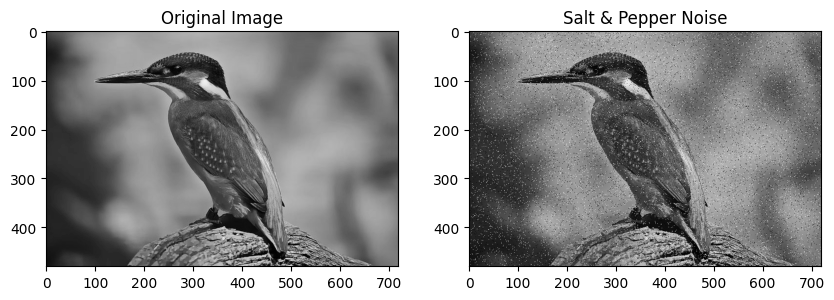

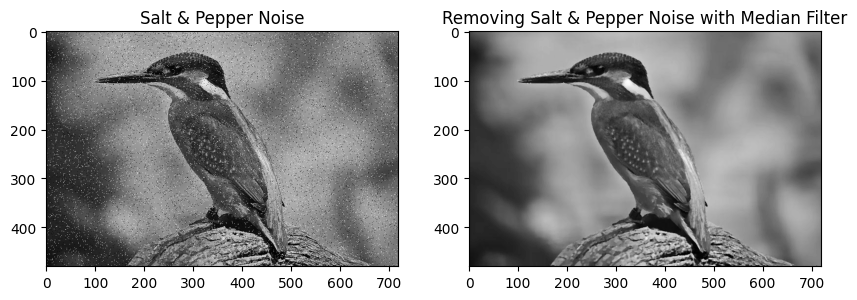

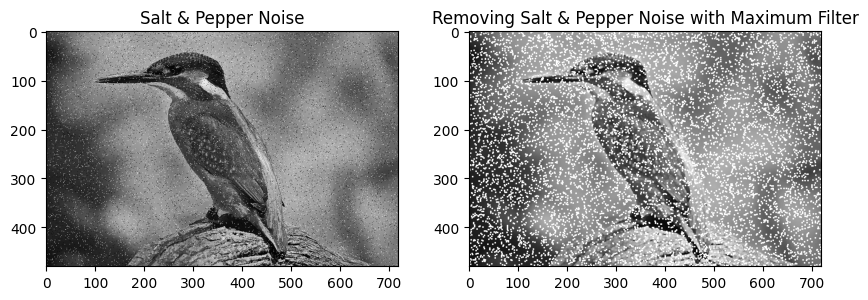

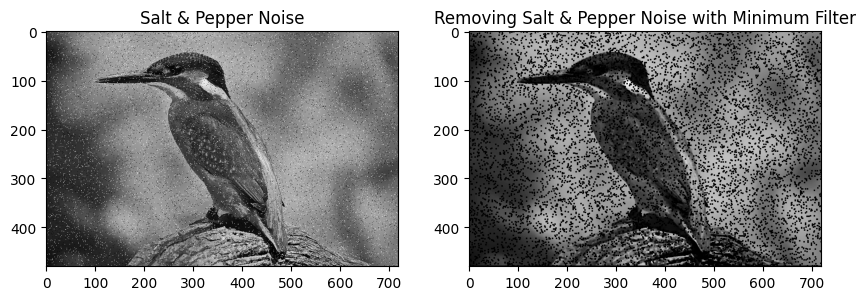

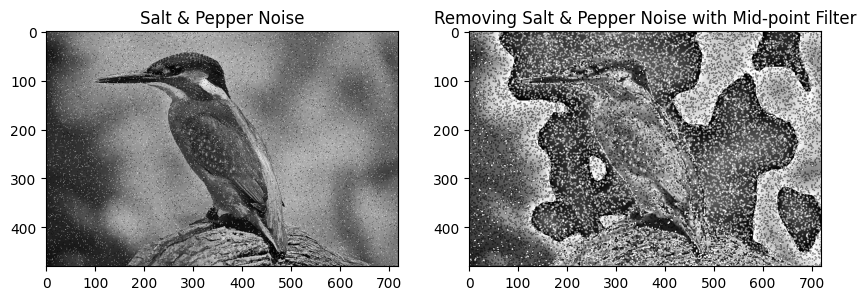

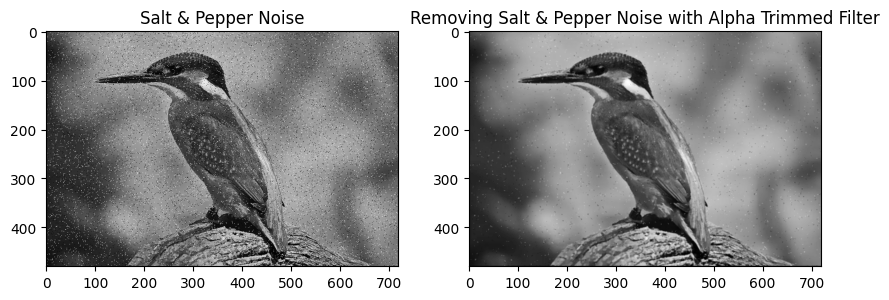

In [13]:
# Adding salt and pepper noise to the image
img_sp = random_noise(image, mode='s&p')
img_sp = (255 * img_sp).astype(np.uint8)

plot_image(img_sp, "Salt & Pepper Noise")

plot_image(median_filter_custom(img_sp, kernel_size=3), "Removing Salt & Pepper Noise with Median Filter", og_im=img_sp, og_title="Salt & Pepper Noise")

plot_image(max_filter_custom(img_sp, kernel_size=3), "Removing Salt & Pepper Noise with Maximum Filter", og_im=img_sp, og_title="Salt & Pepper Noise")

plot_image(min_filter_custom(img_sp, kernel_size=3), "Removing Salt & Pepper Noise with Minimum Filter", og_im=img_sp, og_title="Salt & Pepper Noise")

plot_image(midpoint_filter(img_sp, kernel_size=3), "Removing Salt & Pepper Noise with Mid-point Filter", og_im=img_sp, og_title="Salt & Pepper Noise")

plot_image(alpha_trimmed_filter(img_sp, kernel_size=3, alpha=1), "Removing Salt & Pepper Noise with Alpha Trimmed Filter", og_im=img_sp, og_title="Salt & Pepper Noise")

### Conclusions

- <b> Median and minimum filters are most suitable for removing salt noise. </b>
- <b> Median and maximum filters are most suitable for removing pepper noise. </b>
- <b> Only median filter is able to remove salt and pepper noise. </b>

# End